# Evaluate the FS algo

Take a time window of prices and decide if SELL, HOLD, BUY, untill the next transaction time.
Iterate through whole history of one stock

In [16]:
using EO, Plots, Lasso

## Stock picking

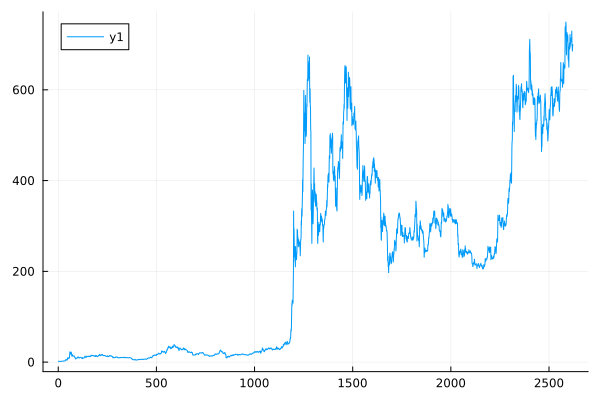

In [17]:
using CSV, DataFrames

set = "SAT"

name = "EA"
#name = "K"

set = "Hanz"
name = "Coca-Cola"
name = "Ford Motor"
name = "3M"
name = "Apple"
#name = "Jaguar Health"
name = "American Airlines"
name = "Solana"
name = "Polkadot"
name = "Ethereum"
name = "BNB"

if set == "SAT"
    data = CSV.read("../trading_data/archive(4)/sp500_stocks.csv", DataFrame)
    price = filter("Symbol" => x->x == name, data).Open
else
    data = CSV.read("../trading_data/whole_dataset/"*name*" Stock Price History.csv", DataFrame)
    price = reverse(data.Price)
end

plot(price)

In [18]:
function generate_predictions(x_max, price, training_width, prediction_width, timestep, expert_cnt)

    ps = Vector{Vector{Vector{Float64}}}()

    training_i = 2:training_width+1
    while training_i[end] + prediction_width < x_max
        x = float.(collect(training_i))                                         # training set
        xt = float.(collect(training_i[1]:(training_i[end]+prediction_width)))  # testing set

        # define training
        variables   = [x]
        operations  = Vector{Function}([+, -, *, EO.protected_div, sin, EO.square, EO.cube, EO.logaritmus])
        arities     = [2,2,2,2,1,1,1,1]
        exprs       = Vector{Any}([:x])
        
        # train expert models
        predictions = Vector{Vector{Float64}}()
        while length(predictions) < expert_cnt
            print("\rtraining expert $(length(predictions)+1)")
            try         # optimization can diverge
                # train a model
                best_model, models_hist = EO.feature_synthesis(float.(price[training_i]), variables, operations, arities, exprs, 100, q=10, μ=3, max_depth=15);
                #best_model, models_hist = EO.feature_synthesis(EO.signal_mean(float.(price[training_i])), variables, operations, arities, exprs, 100, q=10, μ=3, max_depth=15);
                # extract feature for x
                features    = EO.extract_features(models_hist, xt)
                # predict with the best model on the extracted features
                maximal_value = maximum(float.(price[training_i]))+abs(maximum(float.(price[training_i]))-minimum(float.(price[training_i])))
                minimal_value = minimum(float.(price[training_i]))-abs(maximum(float.(price[training_i]))-minimum(float.(price[training_i])))
                prediction  = EO.denoise(EO.prediction(best_model, xt, features; λ=maximal_value, α=minimal_value))
                push!(predictions, prediction)
            catch
                continue
            end
        end

        # evaluate the predictions
        push!(ps, predictions)

        #training_i .+= timestep
        training_i = (training_i[1]+timestep):(training_i[end]+timestep)
    end
    return ps
end

generate_predictions (generic function with 1 method)

In [19]:
#= using CSV, DataFrames, FileIO

x = collect(1:length(price))

training_width = 100
prediction_width = 10
timestep = 10
expert_cnt = 10

res = generate_predictions(length(price), price, training_width, prediction_width, timestep, expert_cnt);
# save for reuse
save(joinpath(@__DIR__, "evaluations", name, "predictions.jld2"), "res", [res, price]) =#

In [20]:
using EO, Plots, Lasso, CSV, DataFrames, FileIO

set = "Hanz"
names = ["BNB", #="Ethereum", "Polkadot", "Solana", "Fuji Electric ADR", "Metal Component Engineering Ltd", "Perdoceo Education", "American Airlines", "3M" , "Apple", "Coca-Cola", "Exxon Mobil", "Ford Motor", "Intel", "Microsoft", "NVIDIA", "Pfizer"=#]
#set = "SAT"
#names = ["EA", "K"]

for name in names

    if set == "SAT"
        data = CSV.read("../trading_data/archive(4)/sp500_stocks.csv", DataFrame)
        price = filter("Symbol" => x->x == name, data).Open
    else
        data = CSV.read("../trading_data/whole_dataset/"*name*" Stock Price History.csv", DataFrame)
        price = reverse(data.Price)
    end
    
    x = collect(1:length(price))

    training_width = 100
    prediction_width = 10
    timestep = 10
    expert_cnt = 10
    
    res = generate_predictions(length(price), price, training_width, prediction_width, timestep, expert_cnt);
    # save for reuse
    save(joinpath(@__DIR__, "evaluations", "deep", name, "predictions.jld2"), "res", [res, price])
end

training expert 50

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 7

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 10

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 10

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 1

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 3

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 6

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 9

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 50

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 9

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 10

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 10

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 20

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 7

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 80

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 9

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 30

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One o

training expert 4

┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365
┌ Warning: One of the predicators (columns of X) is a constant, so it can not be standardized.
│ To include a constant predicator set standardize = false and intercept = false
└ @ Lasso /home/krizjona/.julia/packages/Lasso/Jlo9G/src/Lasso.jl:365


training expert 4

Excessive output truncated after 524305 bytes.

training expert 4